# Text Mining Final Project 2019 - 2020 - LSTM

## Identifying Authors by Their Writings 

## Authors: 
- Lara Neves (m20190867) 
- Susana Paço (m20190821)
- Inês Diogo (m20190301)


In order to ease the weight on the main notebook, a separate notebook was created to keep the LSTM model and its needed pre processing. All of the preprocessing required follows the same functions as in the original notebook. 


In [42]:
#installs - please uncomment those packages that you don't have within your system in order to install them

import sys
#!{sys.executable} -m pip install -U unidecode
#!{sys.executable} -m pip install -U keras
#!{sys.executable} -m pip install -U tensorflow
#!{sys.executable} -m pip install -U nltk
#!{sys.executable} -m pip install git+https://github.com/textpipe/textpipe.git
#!{sys.executable} -m pip install -U spacy
#!{sys.executable} -m  spacy download pt_core_news_sm

In [43]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from collections import defaultdict
from pathlib import Path

import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score


<a class="anchor" id="DPP">

## 1. Data Preprocessing

</a>


<a class="anchor" id="rename">

### 1.1. Renaming .txt Files
</a>
   
We will start by renaming the .txt files so there's no duplicates and we create a standardized form to 
identify each .txt file.


In [3]:
#Changing the names of the .txt files so there's no duplicates and we create a standardized form to 
#identify each .txt

def change_file_name(author):
    i = 0
    my_dir_path = "Data/Corpora/train/" + author
    
    for filename in os.listdir(my_dir_path): 
        
        #Define the new and old names with directory path
        new_name =str(author) + str(i) + ".txt"
        old_name = my_dir_path + '/' + filename 
        new_name = my_dir_path + '/' + new_name 
        
        #So it doesn't give out an error when it runs for the second time
        # rename all the files 
        if new_name != old_name: #IT STILL GIVES OUT ERROR
            os.rename(old_name, new_name) 
        i += 1

In [4]:
authors = ['AlmadaNegreiros','CamiloCasteloBranco','EcaDeQueiros','JoseRodriguesSantos','JoseSaramago','LuisaMarquesSilva']
authors_sigla = ['AN','CCB','EQ','JRS','JS','LMS']



#### ONLY RUN ONCE IF THE FILE NAMES ARE THE ORIGINAL otherwise, running a second time, will give an error

In [5]:
#for a in range(len(authors)):
#    change_file_name(authors[a])

<a class="anchor" id="extract">

### 1.2. Extracting Data

In [6]:
#Create a df for one author the respective .txt files in the corpora
def create_df_from_txt(author):
    my_dir_path = "Data/Corpora/train/" + author

    results = defaultdict(list)
    for file in Path(my_dir_path).iterdir():
        with open(file, "r",encoding = 'utf8') as file_open:
            results["id"].append(file.name)
            results["text"].append(file_open.read())
            results["author"] = author
            file_open.close()
    df = pd.DataFrame(results)
    
    return df

In [7]:
#Join together the dataframes from all the authors
def join_df(authors):

    df = pd.DataFrame()
    for a in range(len(authors)):
        df = df.append(create_df_from_txt(authors[a]))
    df.reset_index(inplace = True, drop = True)    
    return df 

In [8]:
### Running all the functions

#Creating the training data frame
traindf = join_df(authors)

#Replacing the name of the authors with labels of their initials
for i in range(0,len(authors)):
    traindf.author = traindf.author.replace(authors[i],authors_sigla[i])
traindf

,id,text,author
0,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN
1,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN
2,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN
3,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN
4,AlmadaNegreiros5.txt,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,AN
...,...,...,...
58,LuisaMarquesSilva3.txt,CONTROL Z\nChegou a hora de vos contar. Chegou...,LMS
59,LuisaMarquesSilva2.txt,O terrível caso do botão assassino\nLuísa Marq...,LMS
60,LuisaMarquesSilva0.txt,A BELA HISTÓRIA DE DINIS E BEATRIZ OU REQUIEM ...,LMS
61,LuisaMarquesSilva1.txt,\n\n\nAcabou-se!\nLuísa Marques da Silva\n\nTí...,LMS


# Test DF

In [9]:
#Create a df for one author the respective .txt files in the corpora
def create_df_from_txttest(numberofwords):
    my_dir_path = "Data/Corpora/test/"+ str(numberofwords)

    results = defaultdict(list)
    for file in Path(my_dir_path).iterdir():
        with open(file, "r",encoding = 'utf8') as file_open:
            results["id"].append(file.name)
            results["text"].append(file_open.read())
            results["numberofwords"] = numberofwords
            file_open.close()
    df = pd.DataFrame(results)
    
    return df

In [10]:
def join_dftest(numberofwords):

    df = pd.DataFrame()
    for a in range(len(numberofwords)):
        df = df.append(create_df_from_txttest(numberofwords[a]))
    df.reset_index(inplace = True, drop = True)    
    return df 


In [11]:
numberofwords = [1000, 500]


In [12]:
### Running all the functions

#Creating the training data frame
testdf = join_dftest(numberofwords)



In [13]:
testdf

,id,text,numberofwords
0,text6.txt,"""O Senhor ensina pela pena o que o homem não s...",1000
1,text5.txt,"O cahos de cima a descer, a descer com a morta...",1000
2,text4.txt,"Agora, porém, era sem fervor, arrastadamente, ...",1000
3,text1.txt,"Depois, pouco a pouco, a tranquilidade regress...",1000
4,text3.txt,"Quase um mês depois, a época de exames aproxim...",1000
5,text2.txt,Justamente como se eu tivesse tido a ideia de ...,1000
6,text6.txt,"""O Senhor ensina pela pena o que o homem não s...",500
7,text5.txt,"O cahos de cima a descer, a descer com a morta...",500
8,text4.txt,"Agora, porém, era sem fervor, arrastadamente, ...",500
9,text1.txt,"Depois, pouco a pouco, a tranquilidade regress...",500


From analysis of the texts, these are the supposed y_test values

In [14]:
# fill a y_test column with possible answers



testdf.loc[testdf['id'] == 'text1.txt', 'possibleanswer'] = 'JS'
testdf.loc[testdf['id'] == 'text2.txt', 'possibleanswer'] = 'AN'
testdf.loc[testdf['id'] == 'text3.txt', 'possibleanswer'] = 'unknown'
testdf.loc[testdf['id'] == 'text4.txt', 'possibleanswer'] = 'EQ'
testdf.loc[testdf['id'] == 'text5.txt', 'possibleanswer'] = 'CCB'
testdf.loc[testdf['id'] == 'text6.txt', 'possibleanswer'] = 'JRS'




        

<a class="anchor" id="clearMD">

### 1.2. Clearing MetaData
</a>

The majority of the .txt files have metadata at the beginning. This is unnecessary and may introduce noise in our model, as such it may be a good idea to remove it. 

In [15]:
#author names to remove them from metadata
authors = ["José de Almada Negreiros", "José de ALMADA-NEGREIROS", "JOSÉ DE ALMADA-NEGREIROS", "Almada Negreiros", "Camilo Castelo Branco", "CAMILLO CASTELLO BRANCO", "CAMILLO CASTELLO-BRANCO", "Camillo Castello Branco", "Eça de Queirós", "Eca de Queiros", "José Rodrigues dos Santos","Jose Rodrigues dos Santos", "JOSÉ RODRIGUES DOS SANTOS", "José Saramago", "Jose Saramago", "JoSÉ SaRamago", "Luísa Marques Silva", "Luisa Marques Silva", "Luísa Marques da Silva"]  

    

In [16]:
#book names to stop words
authorsandbooks = pd.read_excel('Data/AuthorsAndBooks.xlsx')
authorsandbooks.head(3)

,Eça de Queirós,Camilo Castelo Branco,Almada Negreiros,Saramago,José Rodrigues dos Santos,Luísa Marques Silva
0,O Mistério da Estrada de Sintra,Anátema,O Moinho,Terra do Pecado,"Comunicação, Difusão Cultural, 1992; Prefácio",Acabou-se!
1,O Crime do Padre Amaro,Os Mistérios de Lisboa,Os Outros,Manual de Pintura e Caligrafia,Crónicas de Guerra I - Da Crimeia a Dachau,Sete Histórias por Acontecer
2,A Tragédia da Rua das Flores,A Filha do Arcediago,"23, 2º Andar",Levantado do Chão,Crónicas de Guerra II - De Saigão a Bagdade,e-Medo


In [17]:
#authors work to arrays

# Eça Queirós books
Eca = authorsandbooks['Eça de Queirós']
Eca = Eca.dropna()
Eca = pd.array(Eca)


#Camilo Castelo Branco books
camilo = authorsandbooks['Camilo Castelo Branco']
camilo = camilo.dropna()
camilo = pd.array(camilo)


# Almada Negreiros books
Almada = authorsandbooks['Almada Negreiros']
Almada = Almada.dropna()
Almada = pd.array(Almada)


# Saramago books
Saramago = authorsandbooks['Saramago']
Saramago = Saramago.dropna()
Saramago = pd.array(Saramago)


# José Rodrigues dos Santos books
JRodriguesSantos = authorsandbooks['José Rodrigues dos Santos']
JRodriguesSantos = JRodriguesSantos.dropna()
JRodriguesSantos = pd.array(JRodriguesSantos)


# Luísa Marques Silva books
luisaMarquesSilva = authorsandbooks['Luísa Marques Silva']
luisaMarquesSilva = luisaMarquesSilva.dropna()
luisaMarquesSilva = pd.array(luisaMarquesSilva)

In [18]:
import re
from tqdm import tqdm_notebook as tqdm #progressbar

def removemetadata(doc):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc['text'].iloc[i,]
        for w in authors:
            text = re.sub(w,"",text)
        for x in Eca:
            text = re.sub(x,"",text)
        for t in camilo:
            text = re.sub(t,"",text)
        for s in Almada:
            text = re.sub(s,"",text)
        for y in Saramago:
            text = re.sub(y,"",text)
        for n in JRodriguesSantos:
            text = re.sub(n,"",text)
        for m in luisaMarquesSilva:
            text = re.sub(m,"",text)
        processed_corpus.append(text)
    return processed_corpus

In [19]:
#create a column to test the results of removing crucial metadata text
traindf['removeMetadata'] = removemetadata(traindf)
testdf['removeMetadata'] = removemetadata(testdf)

In [20]:
traindf.head()

,id,text,author,removeMetadata
0,AlmadaNegreiros3.txt,\nTitle: Litoral\n A Amadeo de Souza Car...,AN,\nTitle: \n \n\nAuthor: \n\nContributor:...
1,AlmadaNegreiros2.txt,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,AN,\n\nTitle: \n\nAuthor: \n\nRelease Date: Septe...
2,AlmadaNegreiros0.txt,Title: A Scena do Odio\n\nAuthor: José de Alma...,AN,Title: \n\nAuthor: \n\nRelease Date: September...
3,AlmadaNegreiros1.txt,Title: O Jardim da Pierrette\n\nAuthor: José d...,AN,Title: \n\nAuthor: \n\nRelease Date: September...
4,AlmadaNegreiros5.txt,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,AN,\n\n**\n\n\n*K4\n\no quadrado\n\nAZUL*\n\nACAB...


<a class="anchor" id="clearTexts">

### 1.4. Cleaning Texts
</a>


In [21]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm_notebook as tqdm #progressbar
from unidecode import unidecode
from nltk.stem import RSLPStemmer
#nltk.download('rslp')

#spacy tools
import pt_core_news_sm
import spacy
spacy_nlp = spacy.load('pt_core_news_sm')



#### Auxiliary functions for preprocessing:

In [22]:
def lowercasing(text):       
    text = text.lower()     
    return text

def to_string(text):
    text = text.split()
    return text

def lemmatization(word):
    lem = WordNetLemmatizer()
    word =lem.lemmatize(word)
    return word

def punctuation(word):
    word = re.sub('[\“\”\ "\-\'`~!@#$%^&*()_|+=?;:,.<>\{\}\[\]\\\/]','', word)
    return word

def stopwords_nltk(word):
    stop_words = set(stopwords.words("portuguese")) 
    return word in stop_words

def stopwords_spacy(word):
    return spacy_nlp.vocab[word].is_stop

def accents(word):
    word = unidecode(word)
    return word

### Preprocessing 1
##### with punctuation and no lemmatization

In [23]:
def preprocessing_with_punc(doc, column):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc[column].iloc[i,]    
    
        text = lowercasing(text)
        
        text = to_string(text)

        textfinal = []
        for word in text:
            if stopwords_nltk(punctuation(word)) or stopwords_spacy(punctuation(word)):
                word = re.sub('[^\“\”\ "\-\'`~!@#$%^&*()_|+=?;:,.<>\{\}\[\]\\\/]','', word)
            else:
                word
            textfinal.append(word)

        text = " ".join(textfinal)
    
        processed_corpus.append(text)
         
    return processed_corpus

In [24]:

#this process takes some time, please have patience
traindf['clean_with_punc'] = preprocessing_with_punc(traindf, 'removeMetadata')
testdf['clean_with_punc'] = preprocessing_with_punc(testdf, 'removeMetadata')

### Preprocessing 2 
##### no punctuation and no lemmatization 

In [25]:
def preprocessing_no_punc(doc, column):
    processed_corpus = []
    for i in tqdm(range(len(doc))):
        text = doc[column].iloc[i,]    
    
        text = lowercasing(text)
        
        text = to_string(text)
        
        text = [punctuation(word) for word in text]

        text = [word for word in text if (not stopwords_nltk(word)) and (not stopwords_spacy(word))]
        
        text = [accents(word) for word in text] 

        text = " ".join(text)
    
        processed_corpus.append(text)
         
    return processed_corpus

In [26]:
traindf['clean_no_punc'] = preprocessing_no_punc(traindf, 'removeMetadata')
testdf['clean_no_punc'] = preprocessing_no_punc(testdf, 'removeMetadata')

## Dividing the text into chunks of 500 words

this process is kept as increasing the number of inputs into the model will help us increase its quality

In [27]:
def split_doc(doc,column,n):
    newdf = pd.DataFrame()
    newdf = newdf.reindex(columns = ['id','chunks','author']) 
    for i in tqdm(range(len(doc))):
        text = doc[column].iloc[i,]

        text = text.split()

        chunks = [' '.join(text[j:j+n]) for j in range(0,len(text),n)]

        for c in chunks:
            data = []
            values = [doc['id'].iloc[i,], c, doc['author'].iloc[i,]]
            a_dictionary = dict(zip(newdf.columns.tolist(), values))
            data.append(a_dictionary)
            newdf = newdf.append(data)
            
    newdf.index =[j for j in range(len(newdf))]  
              
    return newdf

In [28]:
traindf_chunks = split_doc(traindf, 'clean_no_punc' ,500)


# LSTM

In [30]:
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
import itertools
import pandas as pd
import numpy as np
import copy

Using TensorFlow backend.


In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/susanapaco/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:


#Tokenize sentences
print("Tokenizing, tokening, tokenizing...")
#1. Train set
text_list_train = list(traindf_chunks['chunks'])
#text_list_train_lower = [word.lower() for word in text_list_train]
tokenized_text_train = [word_tokenize(i) for i in text_list_train]

#2. Test set
text_list_test = list(testdf['clean_no_punc'])
#text_list_test_lower = [word.lower() for word in text_list_test]
tokenized_text_test = [word_tokenize(i) for i in text_list_test]

#Create vocabulary from train set only
list_of_all_words= list(itertools.chain.from_iterable(tokenized_text_test))
vocabulary =sorted(list(set(list_of_all_words)))

#Remove stopwords (I found out that it makes no difference but you can try on your own)
#vocabulary = [word for word in vocabulary if word not in stopwords.words('english')]

#--------------------------Pre-processing train and test sets----------------------------------
print('Pre-processing - Train')
tokenized_numbers_train = copy.deepcopy(tokenized_text_train)

i=-1
for list in tokenized_numbers_train:
    i=i+1
    j=-1
    for number in list:
        j = j + 1
        if tokenized_numbers_train[i][j] in vocabulary:
            tokenized_numbers_train[i][j]= vocabulary.index(number)
        else:
            tokenized_numbers_train[i][j] = 0

tokens_train = pd.DataFrame(tokenized_numbers_train, dtype='int32')
tokens_train = tokens_train.fillna(0)
tokens_train = tokens_train.astype(int)

print('Pre-processing - test ...')
tokenized_numbers_test = copy.deepcopy(tokenized_text_test)

i=-1
for list in tokenized_numbers_test:
    i=i+1
    j=-1
    for number in list:
        j = j + 1
        if tokenized_numbers_test[i][j] in vocabulary:
            tokenized_numbers_test[i][j] = vocabulary.index(number)
        else:
            tokenized_numbers_test[i][j] = 0

tokens_test = pd.DataFrame(tokenized_numbers_test, dtype='int32')
tokens_test = tokens_test.fillna(0)
tokens_test = tokens_test.astype(int)

print('Keep Preprocessing...')

#Bring both sets to same shape (Choose how many words to use)
max_words_in_sentence=30

#Shorten or extend Train set to reach selected length
if tokens_train.shape[1]>max_words_in_sentence:
    tokens_train = tokens_train.drop(tokens_train.columns[[range(max_words_in_sentence,tokens_train.shape[1])]], axis=1)
else:
    for col in range(tokens_train.shape[1],max_words_in_sentence):
        tokens_train[col]=0

#Shorten or extend Test set to reach selected length
if tokens_test.shape[1] > max_words_in_sentence:
    tokens_test = tokens_test.drop(tokens_test.columns[[range(max_words_in_sentence, tokens_test.shape[1])]],
                                     axis=1)
else:
    for col in range(tokens_test.shape[1], max_words_in_sentence):
        tokens_test[col] = 0

#------------------------------Finish Pre-processing----------------------------------------------------

#Define train and Test sets
train_x = np.array(tokens_train)
train_y = np.array(traindf_chunks['author'])

test_x = np.array(tokens_test)

encoder1 = LabelEncoder()
encoder1.fit(train_y)
encoded_train_Y = encoder1.transform(train_y)
dummy_train_y = np_utils.to_categorical(encoded_train_Y)
dummy_train_y.astype(int)

l=len(vocabulary)+1
inp=train_x.shape[1]


print ("modelling!!!!!!!! ")
#Build an LSTM model
model = Sequential()
model.add(Embedding(l, 64,input_length=inp))
model.add(LSTM(64, dropout=0.4, recurrent_dropout=0.1))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Fit the model
model.fit(train_x, dummy_train_y, epochs=100, batch_size=16, verbose=2)



# Predict and write to file
results = model.predict(test_x)
results = pd.DataFrame(results, columns=['AN','CCB','EQ','JRS','JS','LMS'])
results['prediction'] = results[['AN','CCB','EQ','JRS','JS','LMS']].idxmax(axis=1)
results ['possibleresult'] = testdf['possibleanswer']
results.insert(0, "id", id)


Tokenizing, tokening, tokenizing...
Pre-processing - Train
Pre-processing - test ...
Keep Preprocessing...
modelling!!!!!!!! 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 64)            135296    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 168,710
Trainable params: 168,710
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 3s - loss: 1.4897 - accuracy: 0.3150
Epoch 2/100
 - 2s - loss: 1.2954 - accuracy: 0.4266
Epoch 3/100
 - 2s - loss: 1.0063 - accuracy: 0.5476
Epoch 4/100
 - 2s - loss: 0.9172 - accuracy: 0.5931
Epoch 5/100
 - 2s - loss: 0.8203 - accu

TypeError: '>' not supported between instances of 'float' and 'builtin_function_or_method'

In [36]:
model.evaluate(train_x, dummy_train_y)


3298/3298 [==============================] - 0s 126us/step


[0.0056771598697717375, 0.9987871646881104]

In [38]:
results

,id,AN,CCB,EQ,JRS,JS,LMS,prediction,possibleresult
0,<built-in function id>,2.211483e-09,1.256220e-06,3.181956e-07,9.999974e-01,1.086299e-06,1.476060e-08,JRS,JRS
1,<built-in function id>,2.076855e-05,9.997914e-01,1.472466e-04,1.721187e-05,2.345431e-05,5.879558e-08,CCB,CCB
2,<built-in function id>,8.248107e-05,4.223248e-05,9.998560e-01,1.571103e-06,1.776126e-05,1.933465e-08,EQ,EQ
3,<built-in function id>,2.144518e-11,3.779560e-10,5.657661e-09,1.447884e-09,1.000000e+00,5.161688e-08,JS,JS
4,<built-in function id>,2.172659e-09,6.690935e-07,6.178995e-06,9.999861e-01,7.172130e-06,2.350891e-08,JRS,unknown
5,<built-in function id>,1.487159e-09,9.999983e-01,2.158333e-07,1.037186e-06,3.375156e-07,1.866445e-10,CCB,AN
6,<built-in function id>,2.211483e-09,1.256220e-06,3.181956e-07,9.999974e-01,1.086299e-06,1.476060e-08,JRS,JRS
7,<built-in function id>,2.076855e-05,9.997914e-01,1.472466e-04,1.721187e-05,2.345431e-05,5.879558e-08,CCB,CCB
8,<built-in function id>,8.248107e-05,4.223248e-05,9.998560e-01,1.571103e-06,1.776126e-05,1.933465e-08,EQ,EQ
9,<built-in function id>,2.144518e-11,3.779560e-10,5.657661e-09,1.447884e-09,1.000000e+00,5.161688e-08,JS,JS


### Accuracy and Loss plot

In [39]:
history = model.fit(train_x, dummy_train_y, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
 - 3s - loss: 0.0362 - accuracy: 0.9876
Epoch 2/100
 - 2s - loss: 0.0268 - accuracy: 0.9924
Epoch 3/100
 - 3s - loss: 0.0307 - accuracy: 0.9900
Epoch 4/100
 - 3s - loss: 0.0365 - accuracy: 0.9879
Epoch 5/100
 - 3s - loss: 0.0268 - accuracy: 0.9903
Epoch 6/100
 - 3s - loss: 0.0329 - accuracy: 0.9891
Epoch 7/100
 - 3s - loss: 0.0301 - accuracy: 0.9900
Epoch 8/100
 - 3s - loss: 0.0338 - accuracy: 0.9891
Epoch 9/100
 - 3s - loss: 0.0337 - accuracy: 0.9900
Epoch 10/100
 - 4s - loss: 0.0380 - accuracy: 0.9870
Epoch 11/100
 - 3s - loss: 0.0316 - accuracy: 0.9912
Epoch 12/100
 - 3s - loss: 0.0302 - accuracy: 0.9912
Epoch 13/100
 - 3s - loss: 0.0294 - accuracy: 0.9915
Epoch 14/100
 - 3s - loss: 0.0319 - accuracy: 0.9900
Epoch 15/100
 - 3s - loss: 0.0294 - accuracy: 0.9906
Epoch 16/100
 - 3s - loss: 0.0210 - accuracy: 0.9945
Epoch 17/100
 - 3s - loss: 0.0225 - accuracy: 0.9927
Epoch 18/100
 - 3s - loss: 0.0224 - accuracy: 0.9936
Epoch 19/100
 - 3s - loss: 0.0157 - accuracy: 0.9958
Ep

In [44]:
def plot_metric(n_epochs, model):
    loss = model.history['loss']
    accuracy = model.history['accuracy']
    epochs = range(1,(n_epochs + 1))
    plt.plot(epochs, loss, 'g', label='loss')
    plt.plot(epochs, accuracy, 'b', label='accuracy')
    plt.title('Loss and Accuracy score')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    return plt.show()

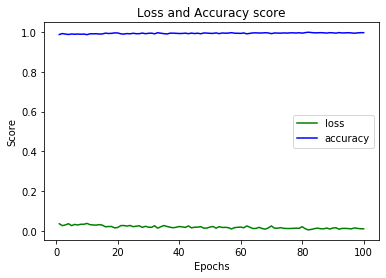

In [45]:
plot_metric(100,history)